# New York Taxi Analysis

Project Outline:

In this project, I will apply and demonstrate the data science pipeline to explore and use deterministic features to predict how much a cab driver can earn per hour in different areas of New York. Once we have the knowledge of which areas earn more and which areas earn less in any given day and any given hour. The union could distribute cab assignments more equitably across different areas, and rotate cab drivers between higher and lower-income areas on a daily basis. This way, no one cab driver would dominate in a high-income area while another cab driver would be continuously evicted to a low-income area. 

<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Gradient boosting](#gradient_boosting)<br>
    7.4. [Comparing algorithm performances](#comparing_algorithm_performances)<br>
8. [Tuning](#tuning)<br>
    8.1. [Find best parameters](#find_best_parameters)<br>
9. [Conclusion](#conclusion)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline


# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

**Check the number of rows and columns after importing data**

In [10]:
taxi_jan_2019 = pd.read_csv('data/yellow_tripdata_2019-01.csv')
taxi_data = pd.concat([taxi_jan_2019])

In [11]:
print('The total number of rows is {}'.format(taxi_data.shape[0]))
taxi_data.head()

The total number of rows is 7667792


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

**OBJECTIVES:**

**Understand the columns and only select the one we need**
    
**Check if there are potential problems with the data**

**Investigate the cause of such problems,and the possible impacts to our analysis**

**Decide how to deal with those data with problems** 

**Metadata link: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf**

In [12]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

**Only Choose the columns that I am interested in:**

In [13]:
taxi_data=taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type','total_amount']]


In [14]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [15]:
taxi_data.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06
mean,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.568222e+01
std,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.622932e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.628000e+02
25%,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,8.190000e+00
50%,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.127000e+01
75%,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.656000e+01
max,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232617e+05


**The best way to explore data is to plot histogram for each column, and to see the range for each column**

array([[<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

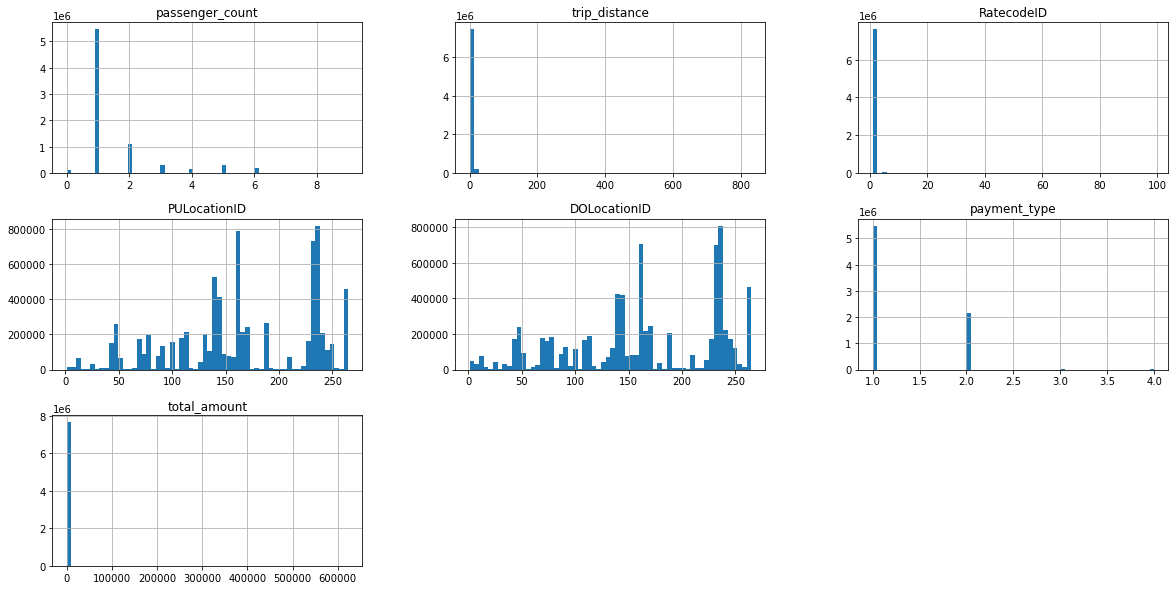

In [16]:
taxi_data.hist(bins=60,figsize=(20,10))

**Potential Problem 1: RateCode should only range from 1 to 6, x axis should not stretch to a hundred**

**Potential Problem 2: Total_Amount may have extreme values, it's abnormal to see payment stretched to tens of thousand USD**

**Potential Problem 3: Trip_Distance may have extreme values, couple hundred miles of trip distance is quite rare** 

 

Lets count the number of occurance for each RateCode:

In [17]:
taxi_data['RatecodeID'].value_counts()

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

1=Standard rate
2=JFK
3=Newark
4=Nassau or Westchester 
5=Negotiated fare 
6=Group ride

Response to Potential Problem 1: 99 seems to be an error and also an outlier

Lets plot and check the outliers for total_amount 

In [18]:
taxi_data['total_amount'].describe()

count    7.667792e+06
mean     1.568222e+01
std      2.622932e+02
min     -3.628000e+02
25%      8.190000e+00
50%      1.127000e+01
75%      1.656000e+01
max      6.232617e+05
Name: total_amount, dtype: float64

In [19]:
taxi_data['trip_distance'].describe()

count    7.667792e+06
mean     2.801084e+00
std      3.737529e+00
min      0.000000e+00
25%      9.000000e-01
50%      1.530000e+00
75%      2.800000e+00
max      8.318000e+02
Name: trip_distance, dtype: float64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

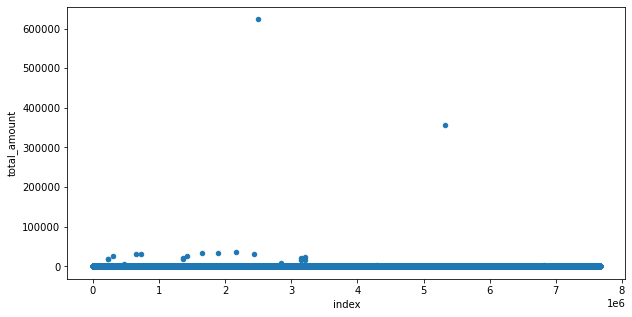

In [20]:
taxi_data.reset_index().plot.scatter('index','total_amount',figsize=(10,5))

Given there are sich a high outliers, I just want to see the plot for values under 1000

<AxesSubplot:xlabel='index', ylabel='total_amount'>

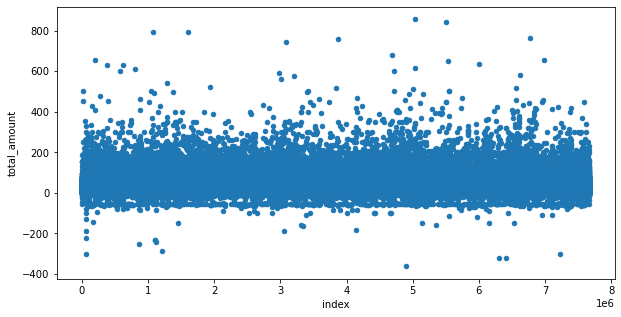

In [21]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot.scatter('index','total_amount',figsize=(10,5))

There are negative values too, which doesn't make sense

<AxesSubplot:xlabel='index', ylabel='total_amount'>

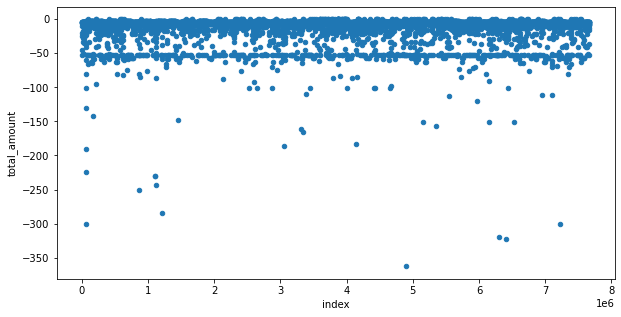

In [22]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot.scatter('index','total_amount',figsize=(10,5))

In [23]:
taxi_data[taxi_data['total_amount']<0].shape[0]

7131

In [24]:
print('The number of rows that contains negative $ total_amount is {} rows'.format(taxi_data[taxi_data['total_amount']<0].shape[0])) 

The number of rows that contains negative $ total_amount is 7131 rows


**Lets check the first five columns that has nagative $ total_amount**

In [25]:
taxi_data[taxi_data['total_amount']<0].head().sort_values(by='total_amount', ascending=True)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8


**It seems like most of the negative $ amount has payment types of 3 or 4, let's double check**

In [26]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

1= Credit card 2= Cash
3= No charge 4= Dispute
5= Unknown 6= Voided trip

According to the metadata, Payment type 3 means 'No Charge', Type 4 means 'Dispute', that means they are not ordinary ocassions and something must have gone wrong. Those negative values is not helpful to our analysis and may even confuse our model.

Response to Potential Problem 2: Abnormal Payment types such as "no charge" and "dispute" is highly associated with negative $ payment

1    4385631
2    1886219
3      28317
4       9504
Name: payment_type, dtype: int64


<AxesSubplot:>

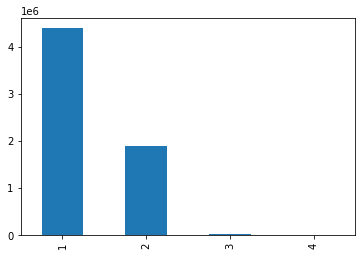

In [27]:
print(taxi_data[taxi_data['total_amount']<20]['payment_type'].value_counts())
taxi_data[taxi_data['total_amount']<20]['payment_type'].value_counts().plot(kind='bar')

In [28]:
taxi_data['PULocationID'].unique().sum()

35032

0.00     1431
0.01      320
0.02      213
0.03      193
0.04      157
         ... 
8.24        1
4.19        1
13.33       1
5.62        1
5.65        1
Name: trip_distance, Length: 662, dtype: int64


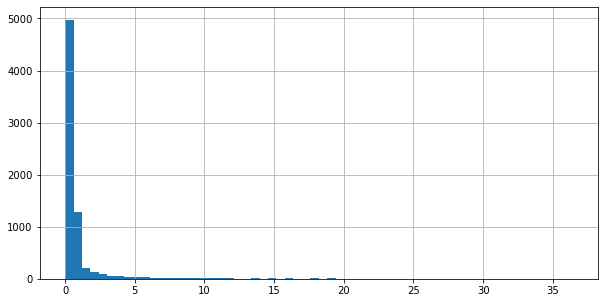

In [29]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60,figsize=(10,5))
print(taxi_data[taxi_data['total_amount']<0]['trip_distance'].value_counts())

**There were 5000 records of trips traveled for zero trip_distance among the negative $total amount**

**It doesn't make sense to see anyone paying negative dollars for a cab. If that was because someone get into the cab and don't want to go anywhere, these records are not going to be useful and may confuse the model**

**It also doesn't make sense to see anyone paying zero dollars for a cab, lets do some analysis for zero $total amount** 

In [30]:
print('The total number of zero $total amount is {}'.format(taxi_data[taxi_data['total_amount']==0].shape[0]))

The total number of zero $total amount is 1414


The total number of zero $total amount with zero trip distance is 1270 

0.00     1270
0.01        4
1.00        4
0.02        4
0.03        3
         ... 
17.60       1
1.20        1
1.33        1
1.75        1
3.20        1
Name: trip_distance, Length: 110, dtype: int64


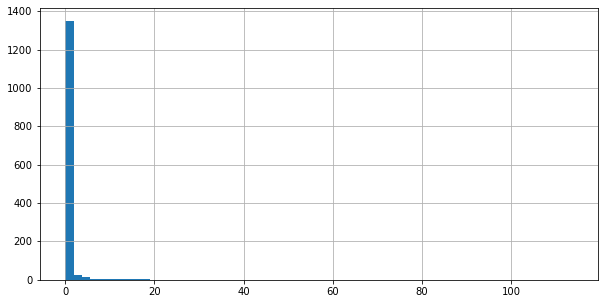

In [31]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60,figsize=(10,5))
print(taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts())

In [32]:
taxi_data[taxi_data['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [33]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

<a id='zero_distance'></a>

In [34]:
taxi_data[taxi_data['total_amount']==0]['PULocationID'].value_counts()

193    707
264    260
7       67
132     24
145     21
      ... 
213      1
216      1
219      1
224      1
1        1
Name: PULocationID, Length: 82, dtype: int64

In [35]:
taxi_data[taxi_data['total_amount']==0]['DOLocationID'].value_counts()  

193    866
264    266
7       79
145     21
152     15
      ... 
197      1
202      1
90       1
216      1
4        1
Name: DOLocationID, Length: 75, dtype: int64

In [36]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()  

0.00     1270
0.01        4
1.00        4
0.02        4
0.03        3
         ... 
17.60       1
1.20        1
1.33        1
1.75        1
3.20        1
Name: trip_distance, Length: 110, dtype: int64

**There were 1270 records of trips traveled for zero trip_distance with zero $total amount.
Further analysis shows that Pickup location ID and dropoff location ID of 193 and 264 together had the highest number of zero dollar payment, and most of the riders used payment type 1 and 2 (Credit Card and Cash), meaning that they traveled for a very short distance that was within the same zone but the data could not show such a small distance/payment precisely, therefore giving the value of zero.**

**After finishing off the zeros and negatives, Let's take a look of the extremely high numbers too**

<AxesSubplot:xlabel='index', ylabel='total_amount'>

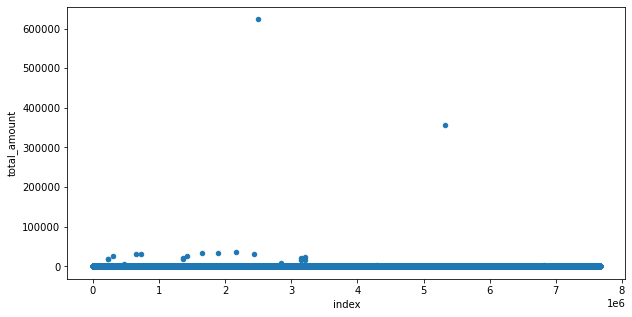

In [37]:
taxi_data.reset_index().plot.scatter('index','total_amount',figsize=(10,5))

**The 2 data point doesn't make sense, how come it cost 40,000 to ride a taxi. Let's determine how many outliers should we filter out by setting an reasonable range of taxi fares, so that our model can have more reasonable inputs**

In [38]:
taxi_data[taxi_data['total_amount']>500]['trip_distance'].value_counts()

0.00      29
0.10       4
19.90      2
15.90      1
21.70      1
1.11       1
110.04     1
1.00       1
107.80     1
8.55       1
123.42     1
0.50       1
9.70       1
113.58     1
14.64      1
100.80     1
214.01     1
2.40       1
16.60      1
17.50      1
5.90       1
8.50       1
131.47     1
1.50       1
Name: trip_distance, dtype: int64

**29 rows having trip distance of 0 has a total amount greater than $500, that justifies the decision to drop data with trip distance of zero because they contain lots of error.**

In [39]:
print('There are {} rows having a $total amount above $500USD'.format(taxi_data[taxi_data['total_amount']>500].shape[0]))
print('There are {} rows having a $total amount above $200USD'.format(taxi_data[taxi_data['total_amount']>200].shape[0]))

There are 56 rows having a $total amount above $500USD
There are 1166 rows having a $total amount above $200USD


**1000 loss of data points sounds like a good compromise and it will make more sense to limit the range that we are trying to predict how much people will pay in each region**

In [40]:
taxi_data['total_amount'].mean()

15.68222215901336

**Since the average just just over 15, we can agree to cut from $200 level**

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

**OBJECTIVES:**

**Filtering out the outliers**

**Check if there are any missing values and duplicates**


**I decide to eliminate all the rows with total_amount of zeros, negative numbers and above $200**

In [41]:
taxi_data_filtered=taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [42]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7667792, 9)


(7659490, 9)

In [43]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [44]:
taxi_data_filtered.duplicated().sum()

0

**For this phase, I have filtered the data and checked that there is no missing values and duplicates**

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

**OBJECTIVES:**

**Transform the data into the formats suitable for analysis**

**Make sure the datatypes are appropriate**

**Categorize the columns**

In [45]:
taxi_data_prepared=taxi_data_filtered.copy()

In [46]:
taxi_data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7659490 entries, 0 to 7667791
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   passenger_count        int64  
 3   trip_distance          float64
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           int64  
 8   total_amount           float64
dtypes: float64(2), int64(5), object(2)
memory usage: 584.4+ MB


**Transforming some variables into suitable formats, such as converting object to datetime, and integer to string**

In [47]:
taxi_data_prepared['tpep_pickup_datetime']=pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'])
taxi_data_prepared['tpep_dropoff_datetime']=pd.to_datetime(taxi_data_prepared['tpep_dropoff_datetime'])

In [48]:
taxi_data_prepared['RatecodeID']=taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared['PULocationID']=taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared['DOLocationID']=taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared['payment_type']=taxi_data_prepared['payment_type'].astype(str)

In [49]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [50]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


**I want to also split the pickup_datetime into seperate columns, so that they may feed into the model easier**

In [51]:
taxi_data_prepared['transaction_date']=pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year']=taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month']=taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day']=taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour']=taxi_data_prepared['tpep_pickup_datetime'].dt.hour

taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


**This dataset should not include months other than January and years other than 2019.
But the above table showed 2018 and Nov/Dec. Further investigation is necessary**

array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

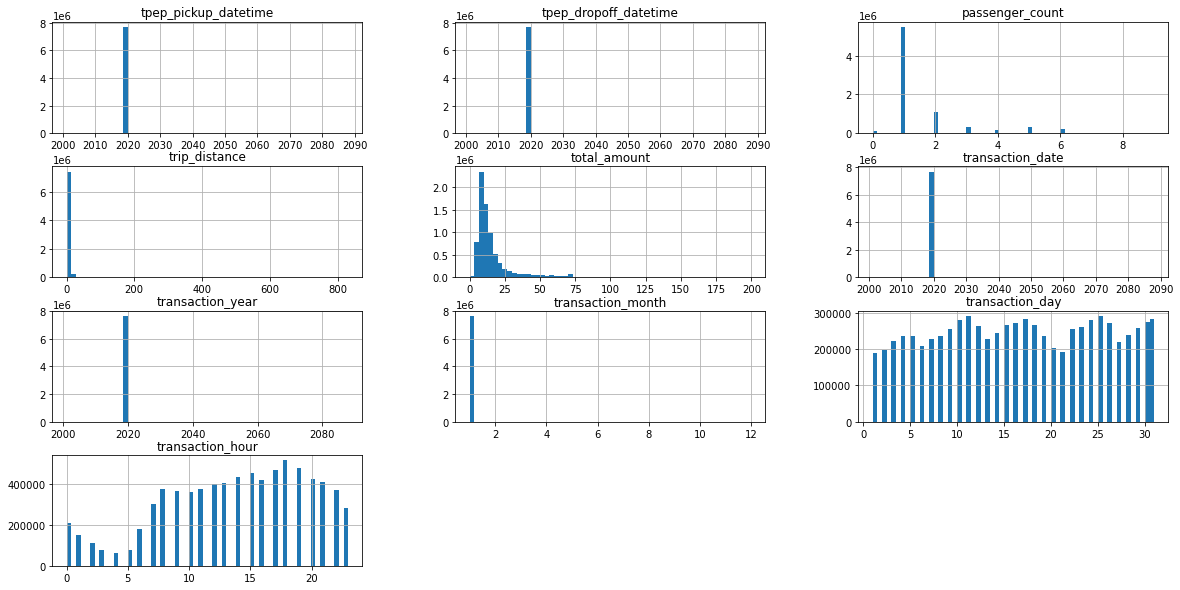

In [52]:
taxi_data_prepared.hist(figsize=(20,10),bins=60)

In [53]:
taxi_data_prepared['transaction_year'].value_counts()

2019    7659048
2018        365
2009         50
2008         22
2003          2
2088          2
2001          1
Name: transaction_year, dtype: int64

In [54]:
taxi_data_prepared['transaction_month'].value_counts()

1     7659008
12        377
2          73
11         10
4           6
7           6
3           5
6           2
5           1
8           1
9           1
Name: transaction_month, dtype: int64

**Let's filter out everything other than 2019 and January**

In [55]:
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_month']==1]
taxi_data_prepared=taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]

**Noting down the Categorical and Numerical columns**

In [56]:
categorical_columns=['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns=['trip_distance','total_amount']
all_needed_columns=categorical_columns+numerical_columns

In [57]:
main_taxi_df=taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()


(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [58]:
##just want to check the total number of pickups at location 151
ID_151=main_taxi_df['PULocationID']=='151'
main_taxi_df[ID_151].shape[0]

69541

**I'll aggregate the data based on the Categorical Columns, that means averaging the trip distance and trip fare of the same hour within that region. I'll also add a column to have the numbers of aggregated transactions for reference**

In [59]:
taxi_grouped_by_region=main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['transactions_aggregated']=main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape) 
taxi_grouped_by_region.head()

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


**This table is cleaned. It has the correct year, month; and is free from duplicates, missing values, outliers, negative values. The table also filters out the rows with payment greater than 200. The only potential problem is the zero trip_distance because the data doesn't have accurate measure for low trip distance within the same region, as stated above.
 [zero_distance](#zero_distance)**

<AxesSubplot:>

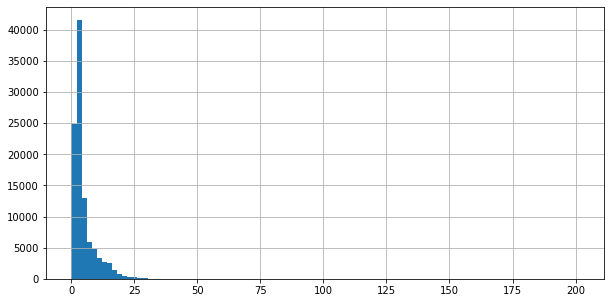

In [60]:
taxi_grouped_by_region['trip_distance'].hist(bins=100,figsize=(10,5))

<AxesSubplot:>

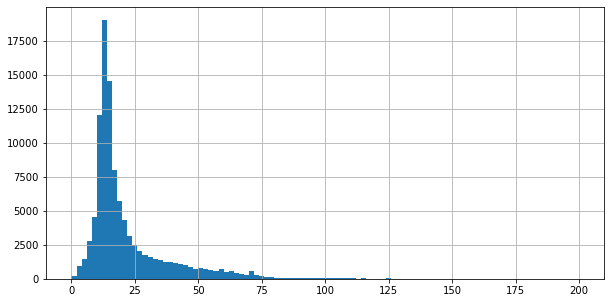

In [61]:
taxi_grouped_by_region['total_amount'].hist(bins=100,figsize=(10,5))

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

**OBJECTIVES:**

**Defining Input Variables and Response Variable**

**Using Location, Data Time to predict Total Amount of Taxi Fares**

In [62]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [63]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark = categorical_features_benchmark+['trip_distance']
target_features_benchmark = 'total_amount'

# 5.1 Train-test split

**33% of our sample data assign to the testing set of our ML model**

In [64]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
Y_bench = data_for_benchmark_model[target_features_benchmark]

# one-hot encoding for categorical features
X_bench = pd.get_dummies(X_bench)


X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, Y_bench, test_size=0.33, random_state=42)

# 5.2 Fit a model to the data

In [65]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

# 5.3 Model evaluation

In [66]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 3.4347282738717344
mean_squared_error 64.49062189766154
root_mean_squared_error 8.030605325731152
r2 0.7698614012902432


<AxesSubplot:xlabel='true', ylabel='pred'>

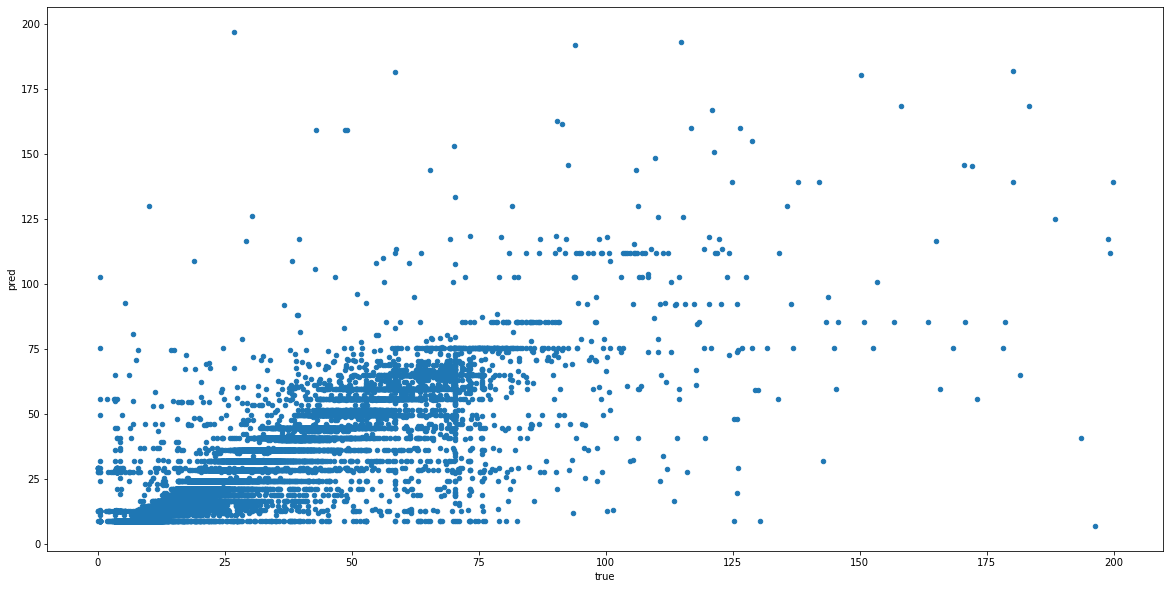

In [67]:
data = {'true':y_test_b, 'pred':y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10),kind='scatter',x='true',y='pred')

# Fix Problem

In [68]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark = categorical_features_benchmark
target_features_benchmark = 'total_amount'

#train and test Split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
Y_bench = data_for_benchmark_model[target_features_benchmark]

# one-hot encoding for categorical features
X_bench = pd.get_dummies(X_bench)


X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, Y_bench, test_size=0.33, random_state=42)

# fit a model
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# evaluate model

model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.77801350668607
mean_squared_error 217.23486109795613
root_mean_squared_error 14.738889411958967
r2 0.22478454924304092


A common rule of thumb for a good RMSE is it's lower than two times the MAE score

<AxesSubplot:xlabel='true', ylabel='pred'>

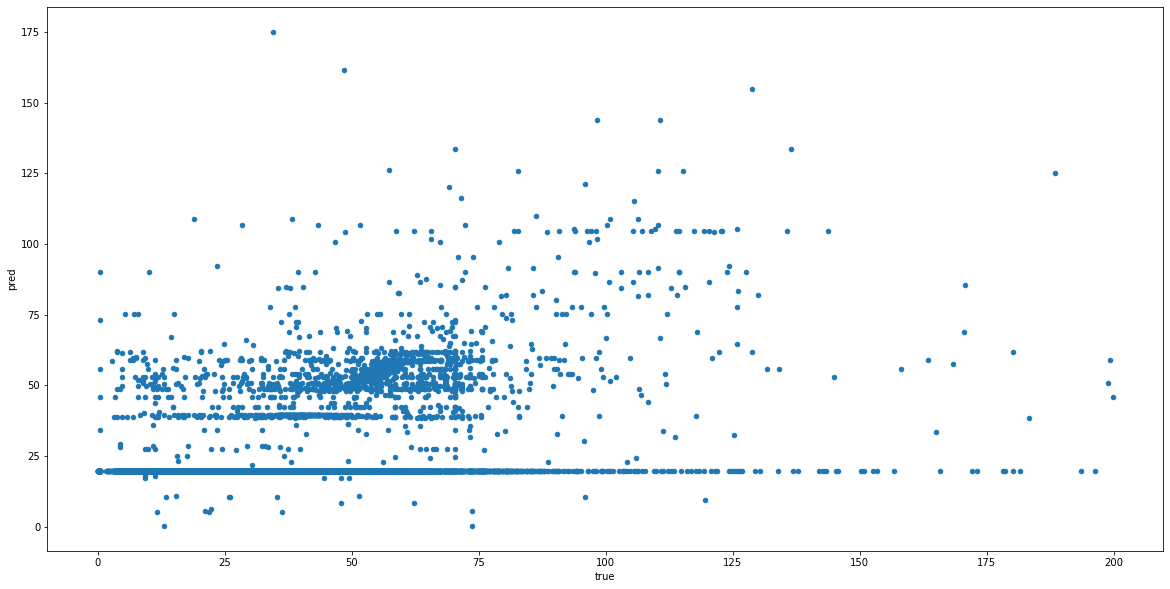

In [69]:
data = {'true':y_test_b, 'pred':y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10),kind='scatter',x='true',y='pred')

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [70]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [71]:
data_with_new_features = taxi_grouped_by_region.copy()

Date-related features

In [72]:
data_with_new_features['transaction_week_day']=data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend']=data_with_new_features['transaction_week_day'].apply(lambda x: True if x==5 or x==6 else False) 

In [73]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays_2019 = cal.holidays(start='2018', end='2020').date

data_with_new_features['is_holiday']=data_with_new_features['transaction_date'].isin(holidays_2019)

In [74]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


Borough information

In [75]:
zone_lookup=pd.read_csv('data/taxi_zone_lookup.csv')
print(zone_lookup.dtypes)
zone_lookup.head()


LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [76]:
zone_lookup=zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID']=zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [77]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID',axis=1,inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [178]:
data_with_new_features[data_with_new_features['Borough']=='Manhattan']['PULocationID'].value_counts()

74     744
125    744
137    744
236    744
148    744
      ... 
153    171
128     64
120     36
105     13
104      1
Name: PULocationID, Length: 68, dtype: int64

In [185]:
a=pd.DataFrame(data_with_new_features[data_with_new_features['Borough']=='Manhattan'])
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45309 entries, 917 to 99770
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PULocationID             45309 non-null  object        
 1   transaction_date         45309 non-null  datetime64[ns]
 2   transaction_month        45309 non-null  int64         
 3   transaction_day          45309 non-null  int64         
 4   transaction_hour         45309 non-null  int64         
 5   trip_distance            45309 non-null  float64       
 6   total_amount             45309 non-null  float64       
 7   transactions_aggregated  45309 non-null  int64         
 8   transaction_week_day     45309 non-null  int64         
 9   weekend                  45309 non-null  bool          
 10  is_holiday               45309 non-null  bool          
 11  Borough                  45309 non-null  object        
dtypes: bool(2), datetime64[ns](1),

In [187]:
b=a[a['transactions_aggregated']>=3]
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43060 entries, 917 to 99770
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PULocationID             43060 non-null  object        
 1   transaction_date         43060 non-null  datetime64[ns]
 2   transaction_month        43060 non-null  int64         
 3   transaction_day          43060 non-null  int64         
 4   transaction_hour         43060 non-null  int64         
 5   trip_distance            43060 non-null  float64       
 6   total_amount             43060 non-null  float64       
 7   transactions_aggregated  43060 non-null  int64         
 8   transaction_week_day     43060 non-null  int64         
 9   weekend                  43060 non-null  bool          
 10  is_holiday               43060 non-null  bool          
 11  Borough                  43060 non-null  object        
dtypes: bool(2), datetime64[ns](1),

Manhattan        45309
Brooklyn         23633
Queens           22002
Bronx             9586
Unknown           1453
Staten Island      302
EWR                271
Name: Borough, dtype: int64


<AxesSubplot:>

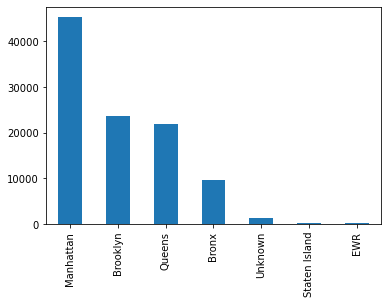

In [78]:
print(data_with_new_features['Borough'].value_counts())
data_with_new_features['Borough'].value_counts().plot(kind='bar')

In [79]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [80]:
nyc_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date and time            2936 non-null   object 
 1   temperature              2936 non-null   float64
 2   humidity                 2936 non-null   int64  
 3   wind speed               2936 non-null   int64  
 4   cloud cover              2932 non-null   object 
 5   amount of precipitation  696 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 137.8+ KB


Potential Datatypes problem:
Datetime, humidity in %, cloud cover in %, Precipitation have mixed types of data

In [81]:
nyc_weather['cloud cover'].value_counts(dropna=False)

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
NaN                                                             4
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [82]:
nyc_weather['amount of precipitation'].value_counts(dropna=False)


NaN                       2240
Trace of precipitation     266
0.3                         61
2.0                         49
1.0                         45
0.5                         42
0.8                         42
4.0                         33
5.0                         24
3.0                         23
6.0                         19
8.0                         13
7.0                         13
9.0                         11
10.0                        10
12.0                         7
13.0                         7
15.0                         6
11.0                         5
16.0                         3
29.0                         2
22.0                         2
14.0                         2
18.0                         1
34.0                         1
25.0                         1
20.0                         1
63.0                         1
30.0                         1
21.0                         1
68.0                         1
24.0                         1
17.0    

In [83]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

Fixing amount of precipitation data problems by filling NaN and replacing strings with 0.1

In [84]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)

#Option 1: Filling NaN with 0, however, I think it's a little bit too much zeros in this case 
#nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].fillna(0,inplace=True)
#Option 2: Forward Filling NaNs
#nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].fillna(method='ffill',inplace=True)
#option 3: Filling NaN with average value between one unit before and after 
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [85]:
nyc_weather['amount of precipitation'].value_counts()

0.100000    762
0.300000     67
2.000000     52
1.000000     46
0.500000     44
           ... 
5.521429      1
0.882609      1
0.340000      1
0.228000      1
3.550000      1
Name: amount of precipitation, Length: 1401, dtype: int64

In [86]:
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 0)
nyc_weather['cloud cover']=nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [87]:
nyc_weather['cloud cover'].value_counts()

0.7    973
1.0    900
0.3    479
0.5    413
0.0    171
Name: cloud cover, dtype: int64

In [88]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [89]:
nyc_weather['date and time']=pd.to_datetime(nyc_weather['date and time'])
nyc_weather['hour']=nyc_weather['date and time'].dt.hour
nyc_weather['day']=nyc_weather['date and time'].dt.day
nyc_weather['month']=nyc_weather['date and time'].dt.month

In [90]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,day,month
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,31,12
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,31,12
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,31,12
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,31,12
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,31,12


We can proceed to merge the nyc_weather with our main table --> data_with_new_features

In [91]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [92]:
nyc_taxi_with_weather=data_with_new_features.merge(nyc_weather,left_on=['transaction_month','transaction_day','transaction_hour'],right_on=['month','day','hour'],how='left')
print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102556, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,day,month
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [93]:
nyc_taxi_with_weather=nyc_taxi_with_weather.drop(['date and time','hour','day','month'],axis=1)

In [94]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [95]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
transactions_aggregated        0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                        0
temperature                68371
humidity                   68371
wind speed                 68371
cloud cover                68371
amount of precipitation    68371
dtype: int64

In [96]:
nyc_taxi_with_weather=nyc_taxi_with_weather.sort_values(by=['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [97]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,NaN,NaN,NaN,NaN,NaN
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,NaN,NaN,NaN,NaN,NaN
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,NaN,NaN,NaN,NaN,NaN
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,NaN,NaN,NaN,NaN,NaN
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,NaN,NaN,NaN,NaN,NaN


Not all weather data can correspond to the exact timing of transaction because the weather was recorded in a 3 hour interval. To fill in the nulls, we can:
1) First Interpolate first to fill in the missing data in the middle of two points

2) Then Backward filling to fill in remaining nulls

In [98]:
nyc_taxi_with_weather=nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather=nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
transactions_aggregated    0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [99]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [100]:
data_for_model = nyc_taxi_with_weather.copy()

In [101]:
categorical_features = ['PULocationID','transaction_month','transaction_day','transaction_hour','transaction_week_day','weekend','is_holiday','Borough']
input_features = categorical_features + ['temperature','humidity','wind speed','cloud cover','amount of precipitation']
target_feature = 'total_amount'

**Train-Test split**

In [102]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## 7.1. Decision tree <a id='decision_tree'></a>

In [103]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train,y_train)

##using training set to train the model

DecisionTreeRegressor(max_depth=10)

In [104]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

## Test Error
##Using X_train y_train to formulate model
##using X_test to generate y_pred -->predicted return
##comparing predicted return with y_testing to see the error 

mean_absolute_error 8.54357348882691
mean_squared_error 197.62071138398343
root_mean_squared_error 14.057763384834141
r2 0.3033746311586576


<AxesSubplot:xlabel='true', ylabel='pred'>

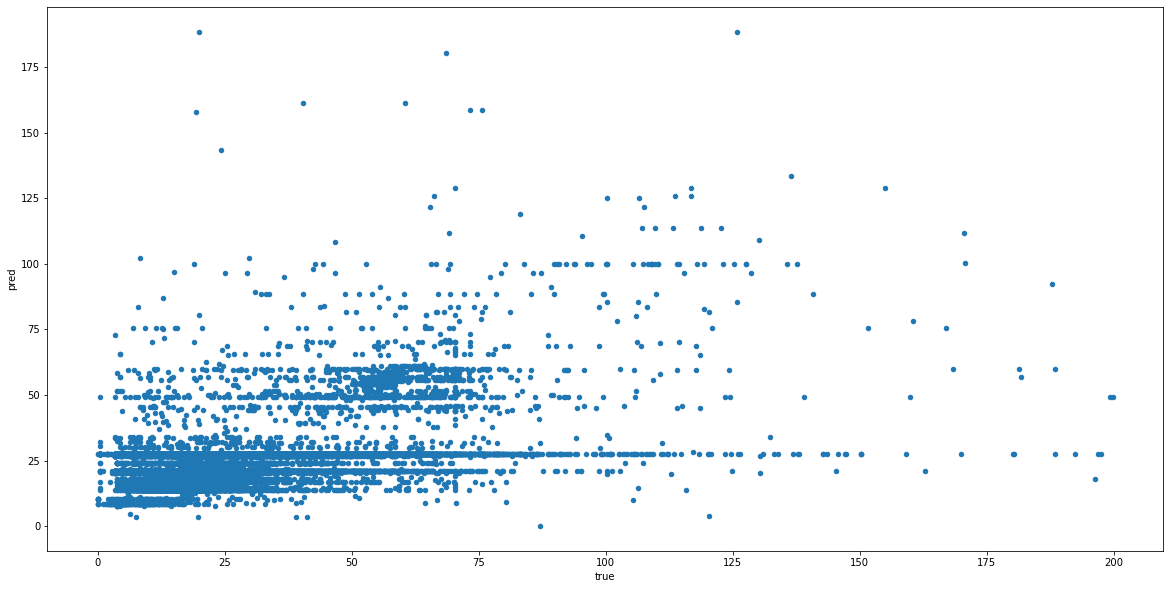

In [105]:
data = {'true':y_test, 'pred':y_pred}
results = pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

**Overfit**

The model fits the training data's pattern so much that it loses the ability to generalise 

In [106]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [107]:
rmse_scores = {'max_depth':[],'rmse_train':[],'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)

    model_at_hand_overfit = decision_tree_overfit
##Training Error
    y_pred_train = decision_tree_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
##Test Error
    y_pred_test = decision_tree_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
##We can make a dataframe for the following three rmse_scores
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [108]:
pd.DataFrame.from_dict(rmse_scores)


,max_depth,rmse_train,rmse_test
0,2,1.495163e+01,15.174393
1,5,1.412253e+01,14.497210
2,8,1.352369e+01,14.145289
3,10,1.313962e+01,14.025661
4,15,1.204887e+01,14.348168
5,20,1.109997e+01,14.508874
6,30,9.498536e+00,15.023233
7,50,5.425101e+00,16.663708
8,70,1.124530e+00,17.354339
9,100,6.453386e-17,17.386299


Text(0.5, 1.0, 'rmse of training vs. testing datasets')

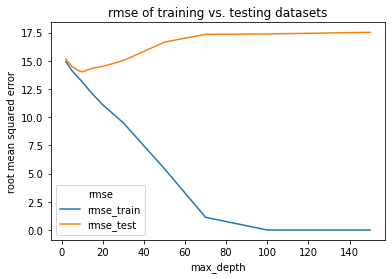

In [109]:
import seaborn as sns
df=pd.DataFrame.from_dict(rmse_scores)
df = df.melt('max_depth', value_name='root mean squared error',var_name='rmse')
axx=sns.lineplot(data=df,x='max_depth',y='root mean squared error',hue='rmse')
axx.set_title('rmse of training vs. testing datasets')

Text(0, 0.5, 'root mean squared error')

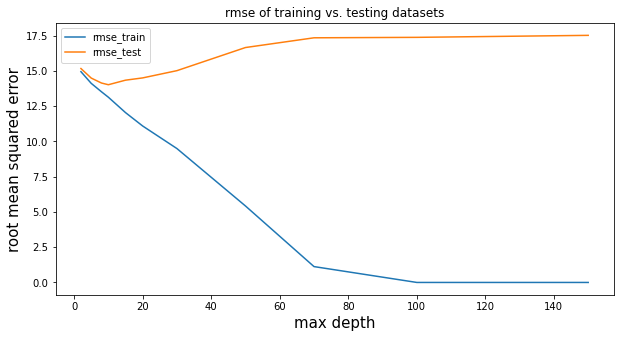

In [110]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(x='max_depth',title="rmse of training vs. testing datasets",figsize=(10,5))
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

**For all the max depth I have tried from 2 to 150, the test error starts getting higher after max depth of 10 as the model started to overfit and loses the ability to generalize**

**The best R^2 that we can get from decision tree algorithm is 0.30 by applying the max depth of 10**

**Underfit**

In [111]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [112]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit,y_train_underfit)

#Training Performance 

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 9.947300430991504
mean_squared_error 239.08086416457166
root_mean_squared_error 15.462239946546285
r2 0.12373835366276398


In [113]:
#Testing Performance 

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 10.082374129980089
mean_squared_error 249.23442786807374
root_mean_squared_error 15.787160221777498
r2 0.12143305210453048


## 7.2. Random forest <a id='random_forest'></a>

In [114]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.434642417528734
mean_squared_error 175.41511877692585
root_mean_squared_error 13.244437276718322
r2 0.3816507340625448


<AxesSubplot:xlabel='true', ylabel='pred'>

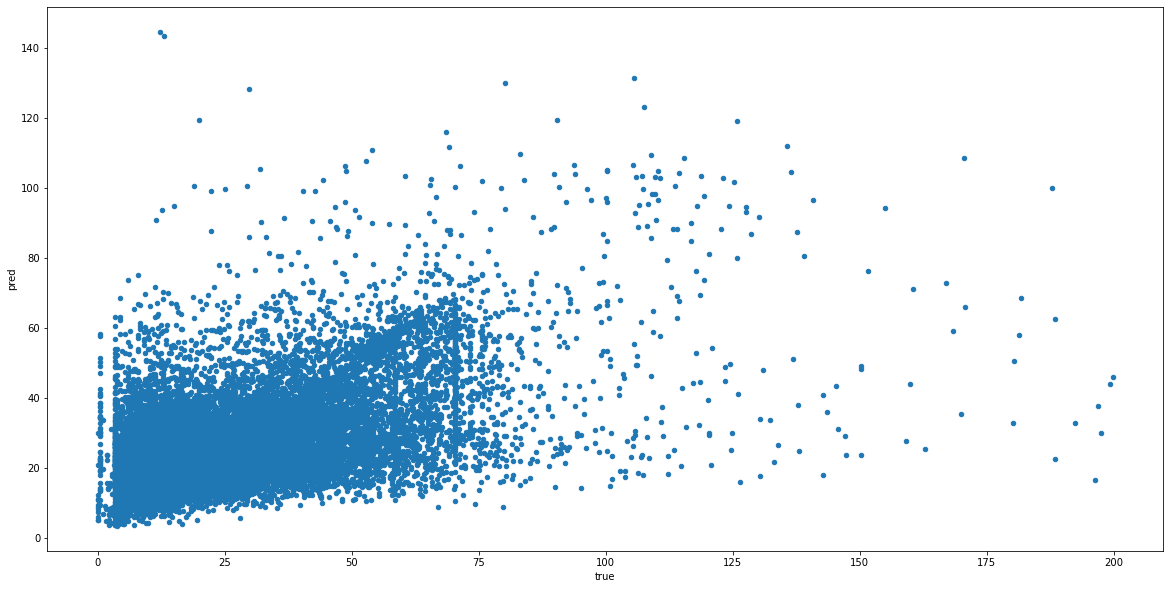

In [116]:
data = {'true':y_test, 'pred':y_pred}
results=pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

## 7.3. Gradient boosting <a id='gradient_boosting'></a>

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [118]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.388075340735144
mean_squared_error 178.9875470075108
root_mean_squared_error 13.378622761985286
r2 0.36905770109367264


<AxesSubplot:xlabel='true', ylabel='pred'>

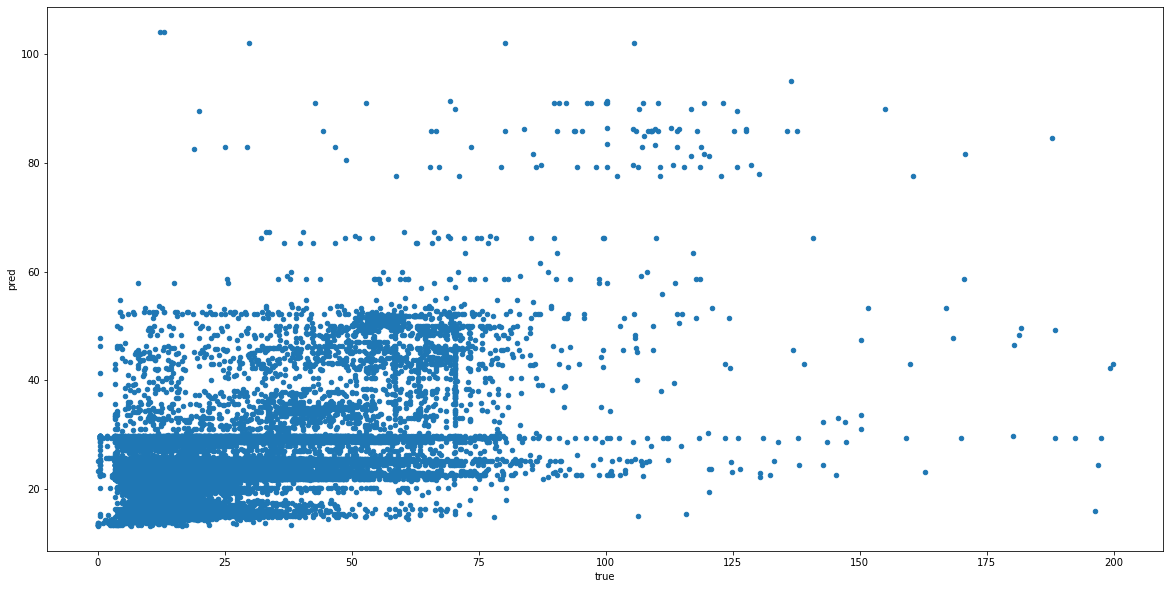

In [119]:
data={'true':y_test,'pred':y_pred}
results=pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

<AxesSubplot:>

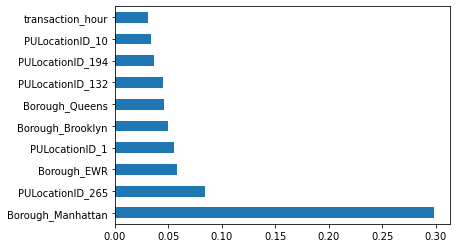

In [120]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
 .nlargest(10).plot(kind='barh'))

## 7.4. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

In [121]:
results = {'Algorithm':['Benchmark model','Decision tree','Random forest','Gradient boosting'],'MAE':[9.778,8.534,7.426,8.388],'RMSE':[14.739,14.011,13.212,13.378],'R2':[0.225,0.308,0.385,0.369]}

pd.DataFrame.from_dict(results)

,Algorithm,MAE,RMSE,R2
0,Benchmark model,9.778,14.739,0.225
1,Decision tree,8.534,14.011,0.308
2,Random forest,7.426,13.212,0.385
3,Gradient boosting,8.388,13.378,0.369


**Random forest is the best model as it has the highest R^2**

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)

## 8.1. Find best parameters<a id='find_best_parameters'></a>

In [122]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split=[2,5,10,20,40]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4,10,20]
# Method of selecting samples for training each tree 
bootstrap = [True, False]

In [164]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)
              

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [165]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random_grid to search for the best hyperparameters 
# First create the base model to tune 
rf = RandomForestRegressor()
# Random Search of parameters, using 3 fold cross validation
# Search across 100 different combinations, and use all available cores 
rf_random=RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train,y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/jonathanau/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [166]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,53.507104,0.217099,2.481645,0.016166,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.402007,0.416075,0.411530,0.409870,0.005862,2
1,16.999298,0.180274,0.886993,0.007274,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.354707,0.369912,0.363970,0.362863,0.006257,7
2,21.583382,0.349220,0.864193,0.015144,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.356088,0.371253,0.363786,0.363709,0.006191,6
3,422.338974,6.657690,1.966635,0.045704,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.351961,0.365844,0.361048,0.359618,0.005757,8
4,1756.927209,54.775406,6.486966,0.574118,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.350632,0.365687,0.375448,0.363922,0.010208,5
5,407.539774,38.362231,22.262377,1.393612,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.382771,0.392962,0.390317,0.388683,0.004318,4
6,70.137407,0.331463,2.890581,0.080011,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.268500,0.279993,0.272459,0.273651,0.004767,9
7,237.163940,3.808417,11.203736,0.171149,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.401065,0.417814,0.407934,0.408937,0.006874,3
8,2575.365712,94.675765,9.572336,0.980374,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.213622,0.213980,0.191036,0.206213,0.010732,10
9,204.956854,1.954262,8.180374,0.425903,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.411373,0.426010,0.422733,0.420038,0.006272,1


In [167]:
performances.to_csv('performances') 

In [123]:
performances=pd.read_csv('performances')
performances.sort_values(by='rank_test_score')

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,9,204.956854,1.954262,8.180374,0.425903,600,10,2,sqrt,500.0,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.411373,0.426010,0.422733,0.420038,0.006272,1
0,0,53.507104,0.217099,2.481645,0.016166,200,10,1,sqrt,200.0,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.402007,0.416075,0.411530,0.409870,0.005862,2
7,7,237.163940,3.808417,11.203736,0.171149,1400,10,10,sqrt,NaN,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.401065,0.417814,0.407934,0.408937,0.006874,3
5,5,407.539774,38.362231,22.262377,1.393612,1200,5,1,sqrt,100.0,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.382771,0.392962,0.390317,0.388683,0.004318,4
4,4,1756.927209,54.775406,6.486966,0.574118,1000,20,20,auto,50.0,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.350632,0.365687,0.375448,0.363922,0.010208,5
2,2,21.583382,0.349220,0.864193,0.015144,200,40,4,sqrt,20.0,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.356088,0.371253,0.363786,0.363709,0.006191,6
1,1,16.999298,0.180274,0.886993,0.007274,200,5,4,sqrt,20.0,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.354707,0.369912,0.363970,0.362863,0.006257,7
3,3,422.338974,6.657690,1.966635,0.045704,400,40,10,auto,20.0,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.351961,0.365844,0.361048,0.359618,0.005757,8
6,6,70.137407,0.331463,2.890581,0.080011,1400,5,20,sqrt,10.0,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.268500,0.279993,0.272459,0.273651,0.004767,9
8,8,2575.365712,94.675765,9.572336,0.980374,1800,10,2,auto,50.0,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.213622,0.213980,0.191036,0.206213,0.010732,10


In [124]:
performances_top=performances[performances['rank_test_score'].isin([1,2])]

In [125]:
performances_top[['rank_test_score','mean_fit_time','param_n_estimators','param_max_depth','mean_test_score','std_test_score']]

,rank_test_score,mean_fit_time,param_n_estimators,param_max_depth,mean_test_score,std_test_score
0,2,53.507104,200,200.0,0.409870,0.005862
9,1,204.956854,600,500.0,0.420038,0.006272


With the Training data, there's not much difference in terms of performances because mean test score and standard deviation is similar 

But the run time will be much shorter for the second best model because the number of estimator is 3 times smaller than the best one



**Testing Model 1 that has highest test score**

In [126]:
import time
t0 = time.time()

best = RandomForestRegressor(n_estimators=600,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=500,bootstrap=False)
best.fit(X_train, y_train)

t1=time.time()-t0
print('Time elapsed:', t1, 'seconds')

model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score   
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))


Time elapsed: 126.23960518836975 seconds
mean_absolute_error 7.329135742978994
mean_squared_error 162.50999997164203
root_mean_squared_error 12.747941009105825
r2 0.4271420850687876


<AxesSubplot:xlabel='true', ylabel='pred'>

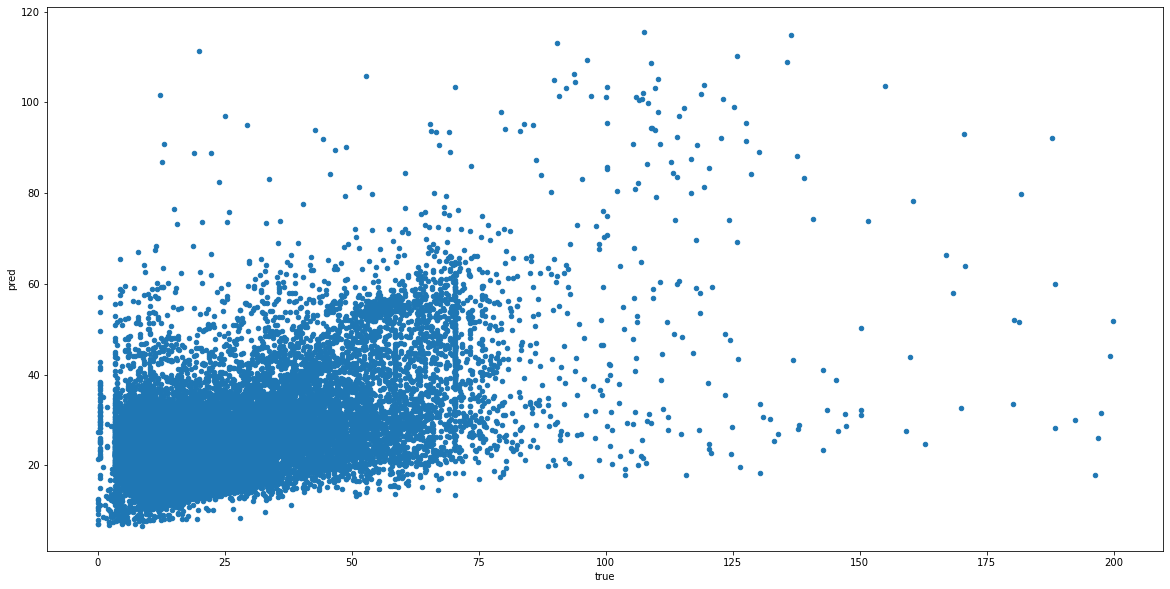

In [127]:
data = {'true':y_test, 'pred':y_pred}
results = pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

**Testing Model 2 that has second highest test score**

In [128]:
import time
t0 = time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=200,bootstrap=False)
second_best.fit(X_train, y_train)

t1=time.time()-t0
print('Time elapsed:', t1, 'seconds')

model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score   
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed: 45.86216592788696 seconds
mean_absolute_error 7.352302211015739
mean_squared_error 166.20653413255238
root_mean_squared_error 12.89211131399944
r2 0.41411157093266904


Let's plot Model 2 

<AxesSubplot:xlabel='true', ylabel='pred'>

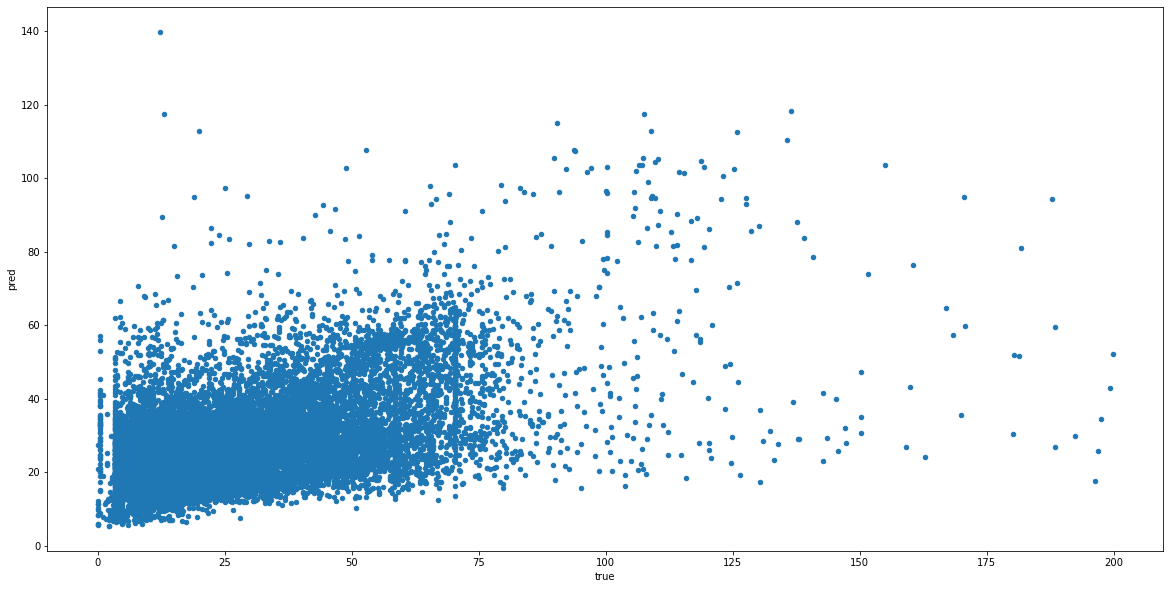

In [129]:
data = {'true':y_test, 'pred':y_pred}
results = pd.DataFrame(data)

results.plot.scatter('true', 'pred',figsize=(20,10)) 

<AxesSubplot:>

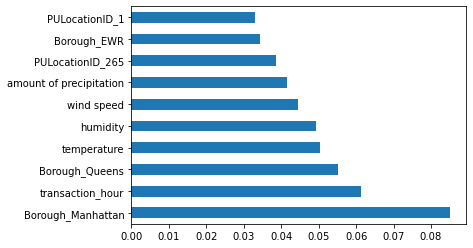

In [130]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))

In [131]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [132]:
data_with_new_features['Borough'].value_counts()

Manhattan        45309
Brooklyn         23633
Queens           22002
Bronx             9586
Unknown           1453
Staten Island      302
EWR                271
Name: Borough, dtype: int64

Thoughts of improvements:

Reduce the Puck Up location feature to only include concentrated areas, such as Manhattan,Brooklyn, Queens, and filter out the rest with relatively fewer data points


Set a minimum number of transaction aggregated for each row, so that we can ensure that each data point for each hour in each region is a true average of cab prices, rather than being based on just one transaction

# 9. Conclusion <a id='conclusion'></a>
[Back to top](#table_of_contents)

# Classification Problem

In [133]:
nyc_taxi_with_weather['total_amount'].describe()

count    102556.000000
mean         21.659732
std          16.625982
min           0.000000
25%          12.389958
50%          15.300000
75%          24.187000
max         199.820000
Name: total_amount, dtype: float64

<AxesSubplot:>

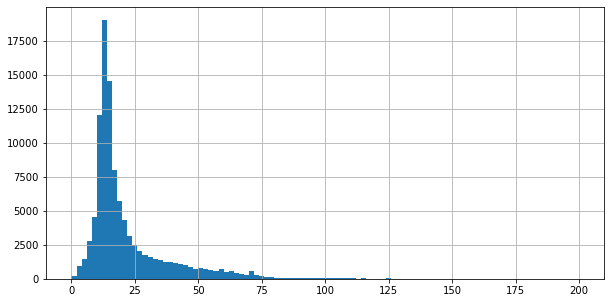

In [134]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [135]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class']=nyc_class['total_amount'].apply(lambda x: 'high' if x>15 else 'low')
nyc_class['earning_class_binary']=nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,transactions_aggregated,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0,low,0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,high,1
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,low,0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,low,0


In [136]:
nyc_class['earning_class'].value_counts()

high    53099
low     49457
Name: earning_class, dtype: int64

**The target feature is the earning class of either High or Low**

In [137]:
categorical_features = ['PULocationID','transaction_month','transaction_day','transaction_hour','transaction_week_day','weekend','is_holiday','Borough']
input_features = categorical_features + ['temperature','humidity','wind speed','cloud cover','amount of precipitation']
target_feature = 'earning_class_binary'

In [138]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.33,random_state=42)

In [139]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c=clf.predict(X_test_c)

In [140]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[11378  5002]
 [ 3684 13780]]
accuracy 0.7433518496631604
precision 0.7336811841124481
recall 0.7890517636280349


<AxesSubplot:>

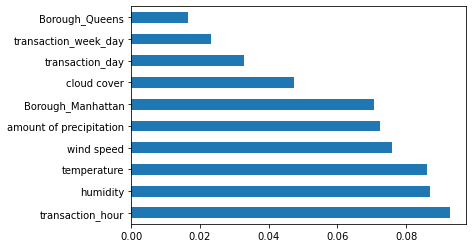

In [141]:
(pd.Series(clf.feature_importances_, index=X_train_c.columns)
   .nlargest(10)
   .plot(kind='barh'))